Dataset loaded successfully!
   sunlight_hours  watering_freq_per_week soil_type water_need
0        7.789136                       6     sandy        low
1       11.668008                       4     loamy       high
2        9.003943                       2     loamy        low
3       11.148641                       5     loamy        low
4        9.384333                       2      clay       high
Model training completed.

 Model Evaluation Matrics:
Accuracy : 0.30
Precision: 0.32
Recall   : 0.30


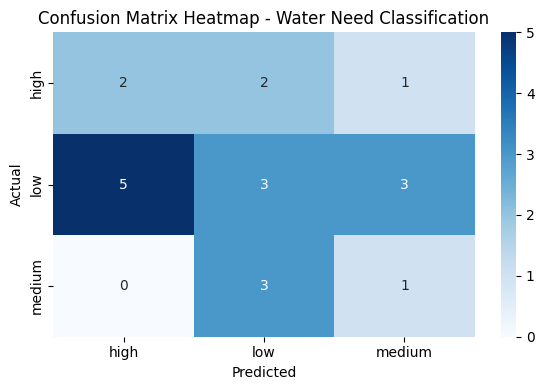

In [4]:
# Import required libraries
import pandas as pd  # for data manipulation
from sklearn.model_selection import train_test_split  # for splitting data
from sklearn.preprocessing import LabelEncoder  # for encoding categorical data
from sklearn.ensemble import RandomForestClassifier  # the classification model
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix  # evaluation metrics
import seaborn as sns  # for visualization
import matplotlib.pyplot as plt  # for plotting

# Load the dataset
df = pd.read_csv("/content/plants.csv")  # load CSV file containing plant data
print("Dataset loaded successfully!")
print(df.head())  # display first few rows of the dataset

# Encode categorical features
label_encoders = {}  # dictionary to store encoders
for column in ['soil_type', 'water_need']:  # loop through categorical columns
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])  # encode column values as integers
    label_encoders[column] = le  # save the encoder for future use

# Split features and target
X = df.drop('water_need', axis=1)  # select all columns except 'water_need' as features
y = df['water_need']  # 'water_need' is the target variable

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80/20 split

# Train the Random Forest model
clf = RandomForestClassifier(random_state=42)  # initialize classifier
clf.fit(X_train, y_train)  # train the model with training data
print("Model training completed.")

#Make predictions on the test data
y_pred = clf.predict(X_test)  # predict using the trained model

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # compute accuracy
precision = precision_score(y_test, y_pred, average='weighted')  # compute precision
recall = recall_score(y_test, y_pred, average='weighted')  # compute recall

#Print evaluation results
print("\n Model Evaluation Matrics:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")

# 🌡️ Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)  # create confusion matrix
class_names = label_encoders['water_need'].classes_  # retrieve original class labels

#Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap - Water Need Classification")
plt.tight_layout()
plt.show()  # display the heatmap
